In [1]:
import numpy as np
import pandas as pd 
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# start_date = '2010-01-01'
# end_date = '2019-01-01'
# goog_data = data.DataReader('GOOG', 'yahoo', start_date, end_date)
df = pd.read_csv('GOOG.csv', index_col='Date', parse_dates=True)
goog_data = df.loc['2014-01-01':'2018-01-01']

In [3]:
goog_data_signal = pd.DataFrame(index=goog_data.index)

In [4]:
goog_data_signal['Price'] = goog_data['Adj Close']
goog_data_signal['Daily Diff'] = goog_data_signal['Price'].diff()
#goog_data_signal['Daily ret'] = goog_data_signal['Price'].pct_change(1)
goog_data_signal

,Price,Daily Diff
Date,,
2014-01-02,554.481689,NaN
2014-01-03,550.436829,-4.044861
2014-01-06,556.573853,6.137024
2014-01-07,567.303589,10.729736
2014-01-08,568.484192,1.180603
...,...,...
2017-12-22,1060.119995,-3.510010
2017-12-26,1056.739990,-3.380005
2017-12-27,1049.369995,-7.369995


In [5]:
'''
Reading the column signal, we have 0 when we need to buy,
and we have 1 when we need to sell
'''
goog_data_signal['Signal'] = np.where(goog_data_signal['Daily Diff'] > 0, 1.0, 0.0) 

In [6]:
'''
To limit the number of orders, we will limit ourselves
to the number of positions we have in the market. It 
will be impossible to buy or sell more than one time
consecutively.

We will go long when the position is 1.0 and go short
when the position is -1.0

We will buy a share of Google on January 6 for 556.573853
and then sell the share for a price of 563.009705. The profit 
of this trade is 563.009705 - 556.573853 = 6.435852
'''
goog_data_signal['Positions'] = goog_data_signal['Signal'].diff()
goog_data_signal.head(8)

,Price,Daily Diff,Signal,Positions
Date,,,,
2014-01-02,554.481689,NaN,0.0,NaN
2014-01-03,550.436829,-4.044861,0.0,0.0
2014-01-06,556.573853,6.137024,1.0,1.0
2014-01-07,567.303589,10.729736,1.0,0.0
2014-01-08,568.484192,1.180603,1.0,0.0
2014-01-09,563.009705,-5.474487,0.0,-1.0
2014-01-10,562.979797,-0.029907,0.0,0.0
2014-01-13,559.393250,-3.586548,0.0,0.0


<h2>Signal Visualization</h2>

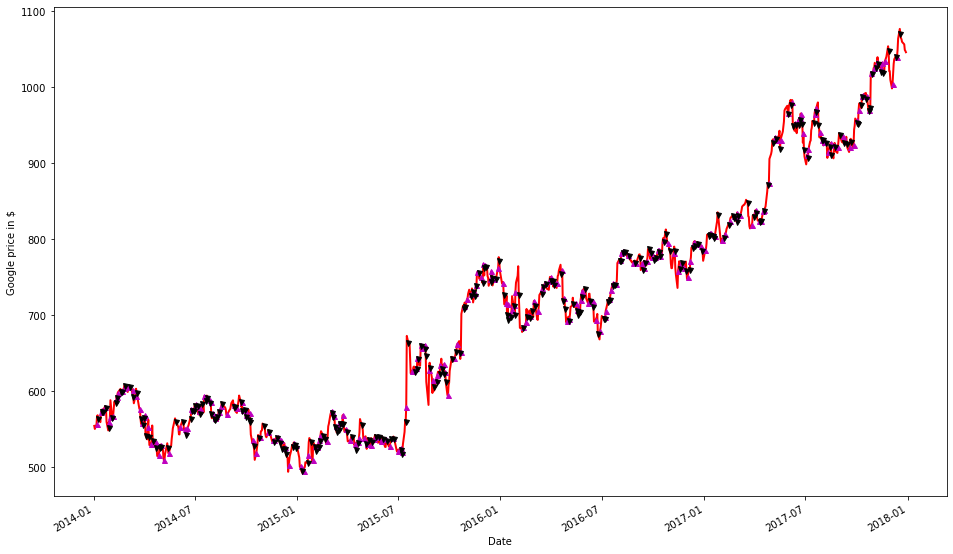

In [7]:
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(111, ylabel='Google price in $')
goog_data_signal['Price'].plot(ax=ax1, color='r', lw=2)
#Draw an UP arrow when we buy
ax1.plot(goog_data_signal.loc[goog_data_signal.Positions == 1.0].index, goog_data_signal.Price[goog_data_signal.Positions == 1.0], '^', markersize=5, color='m')
#Draw an DOWN arrow when we sell
ax1.plot(goog_data_signal.loc[goog_data_signal.Positions == -1.0].index,goog_data_signal.Price[goog_data_signal.Positions == -1.0], 'v', markersize=5, color='k')

<h2>Backtesting</h2>

In [8]:
#We wll start this portfolio with #1000
initial_capital = float(1000.0)

In [9]:
#Create a dataframe for the positions and portfolio
positions = pd.DataFrame(index=goog_data_signal.index).fillna(0.0)
portfolio = pd.DataFrame(index=goog_data_signal.index).fillna(0.0)

In [10]:
#Store the GOOG  positions in this dataframe
positions['GOOG'] = goog_data_signal['Signal']

In [11]:
#Store the amount of GOOG positions for the portfolio in this one
portfolio['Positions'] = (positions.multiply(goog_data_signal['Price'], axis=0))

In [12]:
#Calculate the non-invested money(Cash)
portfolio['Cash'] = initial_capital - (positions.diff().multiply(goog_data_signal['Price'], axis=0)).cumsum()

In [13]:
#Total Investement
portfolio['Total'] = portfolio['Positions'] + portfolio['Cash']

<AxesSubplot:xlabel='Date'>

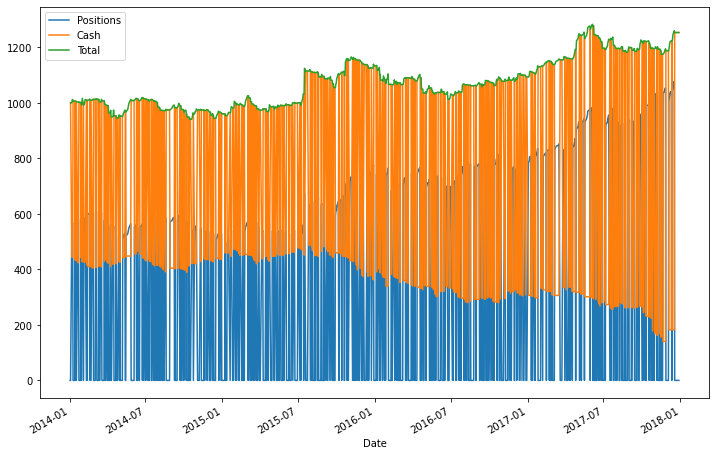

In [14]:
portfolio[['Positions', 'Cash', 'Total']].plot(figsize=(12,8))